In [41]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Para esse trabalho vamos manter apenas as PL que estiverem associadas a um partido

Passos desse notebook

1. Merge de datasets

2. Transformar colunas

3. Adição das porcentagens dos partidos

- Variáveis Categóricas (Partido, Tema, RegimeTramitacao, Ano)
    - One-Hot Encoding
- Variáveis Numéricas (Quantidade de votos do partido X)
    - Normalizar

In [2]:
ObterProposicoes = os.path.join('data', 'ObterProposicoes_2013_2024.csv')
df = pd.read_csv(ObterProposicoes)

## Removendo duplicatas

Devido ao processamento paralelo das requisições, alguns dados foram salvos mais de uma vez com base no ID. Para garantir a integridade dos dados, as duplicatas serão eliminadas.


In [3]:
duplicated_ids = df[df['idProposicao'].duplicated()]['idProposicao']
#print(duplicated_ids)

if duplicated_ids.any():
    df = df.drop_duplicates(subset='idProposicao')

#print(df)

## Ajustando Colunas

In [4]:
df.columns

Index(['nomeProposicao', 'idProposicao', 'idProposicaoPrincipal',
       'nomeProposicaoOrigem', 'tipoProposicao', 'tema', 'Ementa',
       'ExplicacaoEmenta', 'Autor', 'ideCadastro', 'ufAutor', 'partidoAutor',
       'DataApresentacao', 'RegimeTramitacao', 'UltimoDespacho', 'Apreciacao',
       'Indexacao', 'Situacao', 'LinkInteiroTeor', 'apensadas',
       'apensadas_proposicao'],
      dtype='object')

Colunas selecionadas para ficar:

In [5]:
df = df[["nomeProposicao", "idProposicao", "tema", "partidoAutor", "DataApresentacao", "Situacao"]]

In [6]:
df

,nomeProposicao,idProposicao,tema,partidoAutor,DataApresentacao,Situacao
0,PL 7024/2013,605259,Administração Pública,\n,20/12/2013,MESA - Arquivada
1,PL 7025/2013,605279,Direito Penal e Processual Penal; Direitos Hum...,PT,20/12/2013,CCJC - Tramitando em Conjunto
2,PL 7026/2013,605290,"Política, Partidos e Eleições",PT,20/12/2013,CCJC - Tramitando em Conjunto
3,PL 7027/2013,605291,"Política, Partidos e Eleições",\n,20/12/2013,Tranformada no(a) Lei Ordinária 13150/2015
4,PL 7029/2013,605307,Educação,PT,23/12/2013,CFT - Aguardando Designação de Relator(a)
...,...,...,...,...,...,...
73838,PL 3/2024,2416826,Direito Civil e Processual Civil; Economia,\n,10/01/2024,MESA - Aguardando Apreciação pelo Senado Federal
73839,PL 15/2024,2416861,Finanças Públicas e Orçamento,\n,02/02/2024,CDE - Aguardando Parecer
73840,PL 17/2024,2416863,Direito Penal e Processual Penal,PATRIOTA,05/02/2024,CPASF - Tramitando em Conjunto
73841,PL 2/2024,2416804,Economia; Finanças Públicas e Orçamento; Indús...,\n,03/01/2024,Tranformada no(a) Lei Ordinária 14871/2024


- Agrupando temas em categorias

In [7]:
direitos_justica = [
    'Direito Penal e Processual Penal', 'Direito e Justiça', 
    'Direito Civil e Processual Civil', 'Direito Constitucional', 
    'Direito e Defesa do Consumidor', 'Direitos Humanos e Minorias'
]

desenvolvimento_social_urbano = [
    'Cidades e Desenvolvimento Urbano', 'Saúde', 'Educação', 
    'Trabalho e Emprego', 'Arte, Cultura e Religião', 
    'Esporte e Lazer', 'Previdência e Assistência Social', 
    'Homenagens e Datas Comemorativas'
]

economia_desenvolvimento_sustentavel = [
    'Meio Ambiente e Desenvolvimento Sustentável', 'Economia', 
    'Indústria, Comércio e Serviços', 'Finanças Públicas e Orçamento', 
    'Agricultura, Pecuária, Pesca e Extrativismo', 'Estrutura Fundiária', 
    'Turismo', 'Relações Internacionais e Comércio Exterior', 
    'Energia, Recursos Hídricos e Minerais'
]

administracao_politicas_publicas = [
    'Administração Pública', 'Processo Legislativo e Atuação Parlamentar', 
    'Política, Partidos e Eleições', 'Defesa e Segurança', 
    'Comunicações', 'Viação, Transporte e Mobilidade', 
    'Ciência, Tecnologia e Inovação'
]

infraestrutura_gestao_recursos = [
    'Viação, Transporte e Mobilidade', 'Energia, Recursos Hídricos e Minerais', 
    'Estrutura Fundiária', 'Comunicações'
]

- Codificação binária categorizada (se baseando na ideia de One-Hot Encoding)

In [8]:
for col in ['Administração e Políticas Públicas', 
            'Desenvolvimento Social e Urbano', 
            'Direitos e Justiça', 
            'Economia e Desenvolvimento Sustentável', 
            'Infraestrutura e Gestão de Recursos']:
    df.loc[:, col] = 0

In [9]:
def atualizar_colunas(row):
    for tema in direitos_justica:
        if tema in row['tema']:
            row['Direitos e Justiça'] = 1
    for tema in desenvolvimento_social_urbano:
        if tema in row['tema']:
            row['Desenvolvimento Social e Urbano'] = 1
    for tema in economia_desenvolvimento_sustentavel:
        if tema in row['tema']:
            row['Economia e Desenvolvimento Sustentável'] = 1
    for tema in administracao_politicas_publicas:
        if tema in row['tema']:
            row['Administração e Políticas Públicas'] = 1
    for tema in infraestrutura_gestao_recursos:
        if tema in row['tema']:
            row['Infraestrutura e Gestão de Recursos'] = 1
    return row

df = df.apply(atualizar_colunas, axis=1)

- Remoção de linhas que não possuem Partido

In [10]:
df = df[df['partidoAutor'].str.strip() != '']

df = df.drop('tema', axis=1)

df

,nomeProposicao,idProposicao,partidoAutor,DataApresentacao,Situacao,Administração e Políticas Públicas,Desenvolvimento Social e Urbano,Direitos e Justiça,Economia e Desenvolvimento Sustentável,Infraestrutura e Gestão de Recursos
1,PL 7025/2013,605279,PT,20/12/2013,CCJC - Tramitando em Conjunto,0,0,1,0,0
2,PL 7026/2013,605290,PT,20/12/2013,CCJC - Tramitando em Conjunto,1,0,0,0,0
4,PL 7029/2013,605307,PT,23/12/2013,CFT - Aguardando Designação de Relator(a),0,1,0,0,0
5,PL 7022/2013,604998,PSD,19/12/2013,PLEN - Tramitando em Conjunto,0,0,1,0,0
6,PL 7023/2013,605019,PSD,19/12/2013,CFT - Tramitando em Conjunto,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
73834,PL 24/2024,2416874,UNIÃO,05/02/2024,CCJC - Tramitando em Conjunto,0,0,1,0,0
73835,PL 22/2024,2416872,UNIÃO,05/02/2024,CCOM - Tramitando em Conjunto,0,0,1,0,0
73836,PL 18/2024,2416865,PATRIOTA,05/02/2024,CPASF - Tramitando em Conjunto,1,0,0,0,1
73837,PL 20/2024,2416869,UNIÃO,05/02/2024,CPASF - Tramitando em Conjunto,0,0,1,0,0


In [11]:
# @title Verificação de erro ortográfico

tranformada_lei = df['Situacao'].str.contains('tranformada', case=False, na=False).sum()
transformada_lei = df['Situacao'].str.contains('transformada', case=False, na=False).sum()

print(f"Total de situações 'transformadas em lei': {transformada_lei}")
print(f"Total de situações 'tranformadas em lei': {tranformada_lei}")

Total de situações 'transformadas em lei': 0
Total de situações 'tranformadas em lei': 768


- Remoção de linhas que não serão relevantes para a classificação

In [12]:
df = df[df['Situacao'].str.contains('Arquivada', case=False, na=False) | df['Situacao'].str.contains('Tranformada', case=False, na=False)]
df

,nomeProposicao,idProposicao,partidoAutor,DataApresentacao,Situacao,Administração e Políticas Públicas,Desenvolvimento Social e Urbano,Direitos e Justiça,Economia e Desenvolvimento Sustentável,Infraestrutura e Gestão de Recursos
7,PL 7021/2013,604997,PSD,19/12/2013,MESA - Arquivada,0,0,1,0,0
8,PL 7020/2013,604994,PRP,19/12/2013,MESA - Arquivada,0,0,0,1,0
12,PL 7017/2013,604974,PSC,18/12/2013,MESA - Arquivada,0,0,0,1,1
13,PL 7016/2013,604968,PMDB,18/12/2013,MESA - Arquivada,1,0,0,0,0
18,PL 7014/2013,604961,PROS,18/12/2013,MESA - Arquivada,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
73294,PL 636/2024,2419837,CIDADANIA,07/03/2024,MESA - Arquivada,0,1,0,0,0
73331,PL 590/2024,2419509,REPUBLIC,06/03/2024,MESA - Arquivada,0,0,1,0,0
73369,PL 545/2024,2419197,PT,05/03/2024,Tranformada no(a) Lei Ordinária 14901/2024,1,0,0,1,0
73713,PL 147/2024,2417234,SOLIDARI,06/02/2024,Tranformada no(a) Lei Ordinária 14942/2024,0,0,1,0,0


In [13]:
num_arquivada = df['Situacao'].str.contains('arquivada', case=False, na=False).sum()
transformada_lei = df['Situacao'].str.contains('tranformada', case=False, na=False).sum()

print(f"Total de situações 'transformadas em lei': {transformada_lei}")
print(f"Total de situações 'arquivada': {num_arquivada}")

Total de situações 'transformadas em lei': 768
Total de situações 'arquivada': 7298


- Coluna "VirouLei"

In [14]:
df = df.rename(columns={"Situacao": "VirouLei"})

df.loc[:, 'VirouLei']  = df['VirouLei'].str.contains('tranformada', case=False, na=False).astype(int) 

In [15]:
df

,nomeProposicao,idProposicao,partidoAutor,DataApresentacao,VirouLei,Administração e Políticas Públicas,Desenvolvimento Social e Urbano,Direitos e Justiça,Economia e Desenvolvimento Sustentável,Infraestrutura e Gestão de Recursos
7,PL 7021/2013,604997,PSD,19/12/2013,0,0,0,1,0,0
8,PL 7020/2013,604994,PRP,19/12/2013,0,0,0,0,1,0
12,PL 7017/2013,604974,PSC,18/12/2013,0,0,0,0,1,1
13,PL 7016/2013,604968,PMDB,18/12/2013,0,1,0,0,0,0
18,PL 7014/2013,604961,PROS,18/12/2013,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
73294,PL 636/2024,2419837,CIDADANIA,07/03/2024,0,0,1,0,0,0
73331,PL 590/2024,2419509,REPUBLIC,06/03/2024,0,0,0,1,0,0
73369,PL 545/2024,2419197,PT,05/03/2024,1,1,0,0,1,0
73713,PL 147/2024,2417234,SOLIDARI,06/02/2024,1,0,0,1,0,0


- Ajuste de colunas

In [16]:
df['DataApresentacao'] = pd.to_datetime(df['DataApresentacao'], dayfirst=True)

df['ano'] = df['DataApresentacao'].dt.year

colunas = df.columns.tolist()
colunas.insert(4, colunas.pop(colunas.index('ano')))
colunas.insert(11, colunas.pop(colunas.index('VirouLei')))
df = df[colunas]
df.reset_index(drop=True, inplace=True)
df

,nomeProposicao,idProposicao,partidoAutor,DataApresentacao,ano,Administração e Políticas Públicas,Desenvolvimento Social e Urbano,Direitos e Justiça,Economia e Desenvolvimento Sustentável,Infraestrutura e Gestão de Recursos,VirouLei
7,PL 7021/2013,604997,PSD,2013-12-19,2013,0,0,1,0,0,0
8,PL 7020/2013,604994,PRP,2013-12-19,2013,0,0,0,1,0,0
12,PL 7017/2013,604974,PSC,2013-12-18,2013,0,0,0,1,1,0
13,PL 7016/2013,604968,PMDB,2013-12-18,2013,1,0,0,0,0,0
18,PL 7014/2013,604961,PROS,2013-12-18,2013,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
73294,PL 636/2024,2419837,CIDADANIA,2024-03-07,2024,0,1,0,0,0,0
73331,PL 590/2024,2419509,REPUBLIC,2024-03-06,2024,0,0,1,0,0,0
73369,PL 545/2024,2419197,PT,2024-03-05,2024,1,0,0,1,0,1
73713,PL 147/2024,2417234,SOLIDARI,2024-02-06,2024,0,0,1,0,0,1


In [19]:
if not os.path.exists('data/transformed_dfs'):
    os.makedirs('data/transformed_dfs')
    print("Directory data/transformed_dfs created")
else:
    print("Directory data/transformed_dfs already exists")

df.to_csv('data/transformed_dfs/Proposicoes_2013_2024.csv', index=False)
print("File Proposicoes_2013_2024.csv saved")

Directory data/transformed_dfs already exists
File Proposicoes_2013_2024.csv saved


## Visualização dos dados

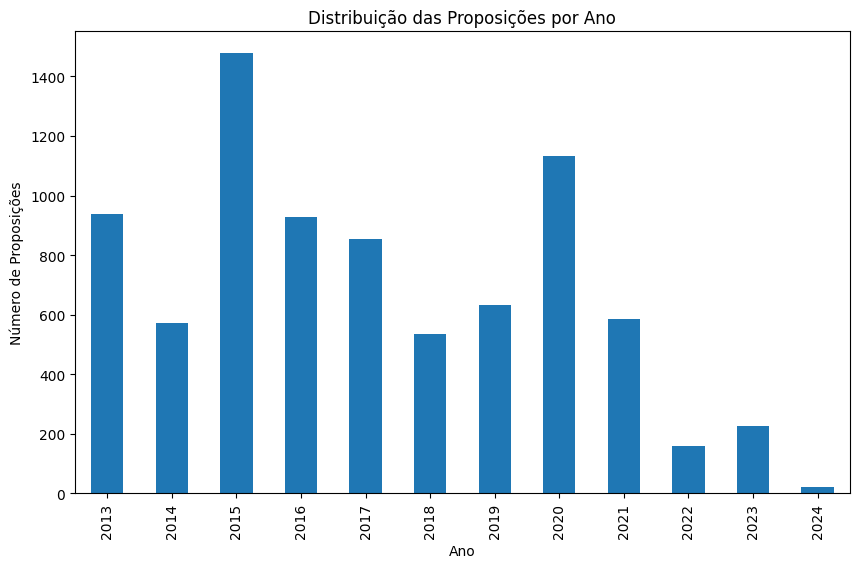

In [21]:
#proporções por ano
plt.figure(figsize=(10, 6))
df['ano'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribuição das Proposições por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Proposições')
plt.show()

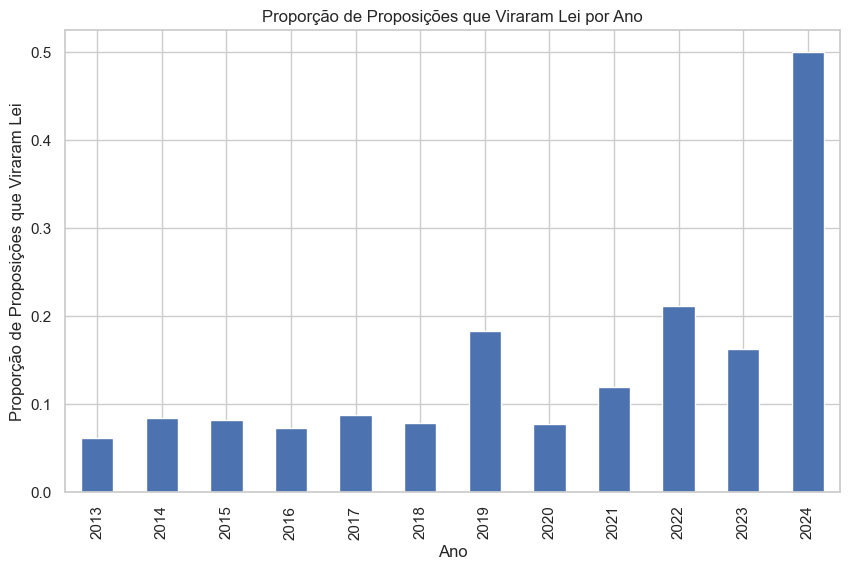

In [30]:
proporcao_virou_lei = df.groupby('ano')['VirouLei'].mean()

plt.figure(figsize=(10, 6))
proporcao_virou_lei.plot(kind='bar')
plt.title('Proporção de Proposições que Viraram Lei por Ano')
plt.xlabel('Ano')
plt.ylabel('Proporção de Proposições que Viraram Lei')
plt.show()

Tabela de Proporções de Proposições que Viraram Lei por Ano e partidoAutor:
partidoAutor AVANTE     CIDADANIA  DEM        MDB        NOVO        \
ano                                                                   
2013                NaN        NaN   0.036364        NaN        NaN   
2014                NaN        NaN   0.121212        NaN        NaN   
2015                NaN        NaN   0.056338        NaN        NaN   
2016                NaN        NaN   0.057971        NaN        NaN   
2017                0.0        NaN   0.092308        NaN        NaN   
2018                0.0        NaN   0.107143      0.125        NaN   
2019                0.0   0.333333   0.263158   0.314286   0.166667   
2020               0.04   0.066667   0.139535   0.022727       0.25   
2021                0.1      0.125   0.275862   0.117647        0.0   
2022                NaN   0.333333        0.0   0.444444        0.0   
2023                0.0        0.0        NaN     0.3125       0.25   
2

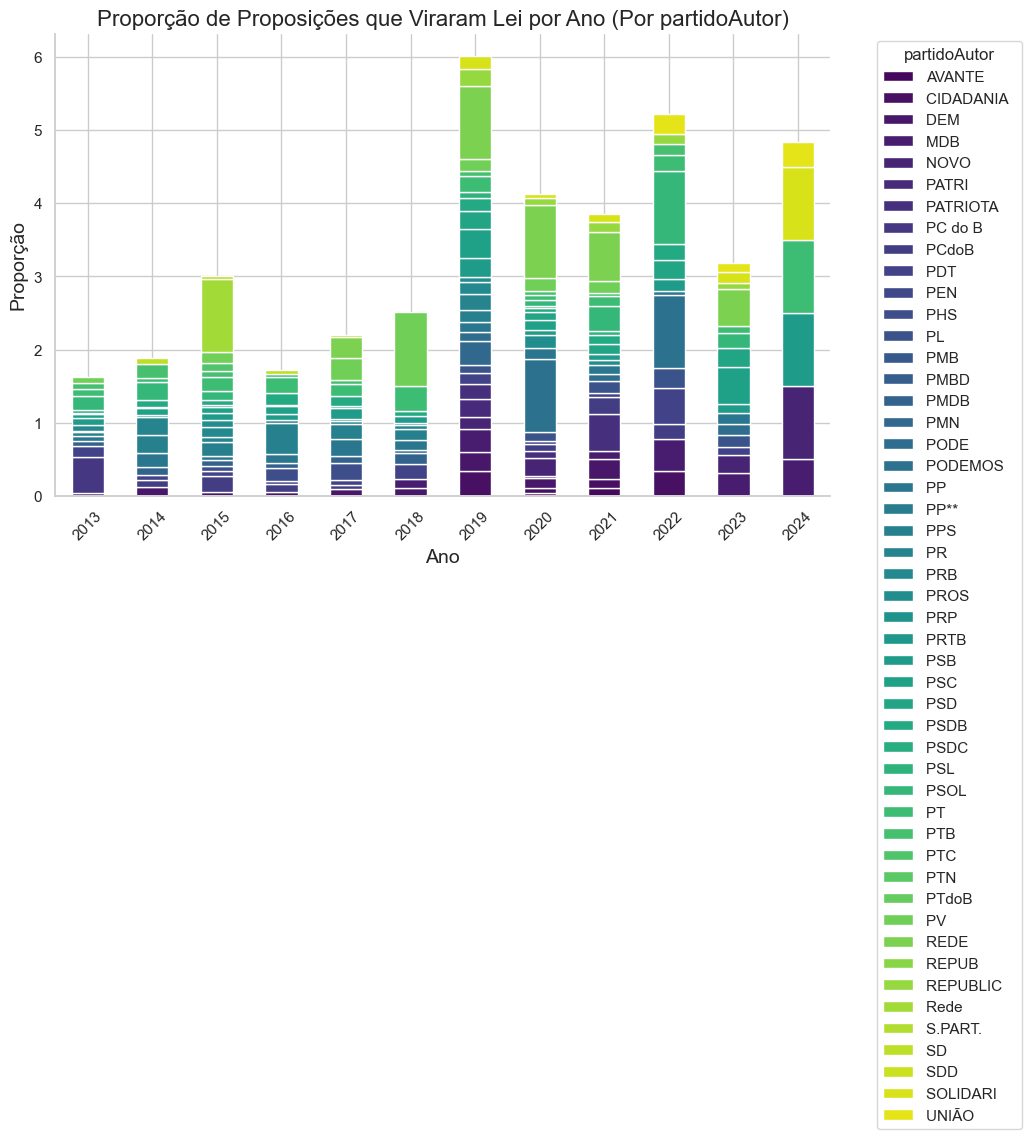

In [54]:
sns.set(style="whitegrid")

#proporção de proposições que viraram lei por ano e partidoAutor
df_categoria = df.groupby(['ano', 'partidoAutor'])['VirouLei'].mean().unstack()


print("Tabela de Proporções de Proposições que Viraram Lei por Ano e partidoAutor:")
print(df_categoria)


cores = sns.color_palette("viridis", 50).as_hex() 

ax = df_categoria.plot(kind='bar', stacked=True, figsize=(10, 6), color=cores)
plt.title('Proporção de Proposições que Viraram Lei por Ano (Por partidoAutor)', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Proporção', fontsize=14)
plt.legend(title='partidoAutor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
sns.despine()
plt.show()

Partido com mais proposições que viraram lei: PT        
Total de proposições aceitas de cada partido:
partidoAutor
PT            104
PSDB           66
PMDB           62
PP             60
DEM            52
PSB            51
PSD            38
PDT            36
PR             31
MDB            29
PL             24
PV             21
PCdoB          19
PPS            18
REPUBLIC       15
PTB            14
PRB            14
PSL            13
PSC            12
UNIÃO          10
PSOL           10
PODE            9
CIDADANIA       8
SD              8
SOLIDARI        7
PROS            7
REDE            7
PHS             5
NOVO            5
PATRIOTA        3
PATRI           2
PODEMOS         2
AVANTE          2
PC do B         1
PTC             1
PMN             1
Rede            1
Name: count, dtype: int64
Ano: 2013, Partido com mais proposições que viraram lei: PT        , Quantidade: 11
Ano: 2014, Partido com mais proposições que viraram lei: PMDB      , Quantidade: 8
Ano: 2015, Partido com ma

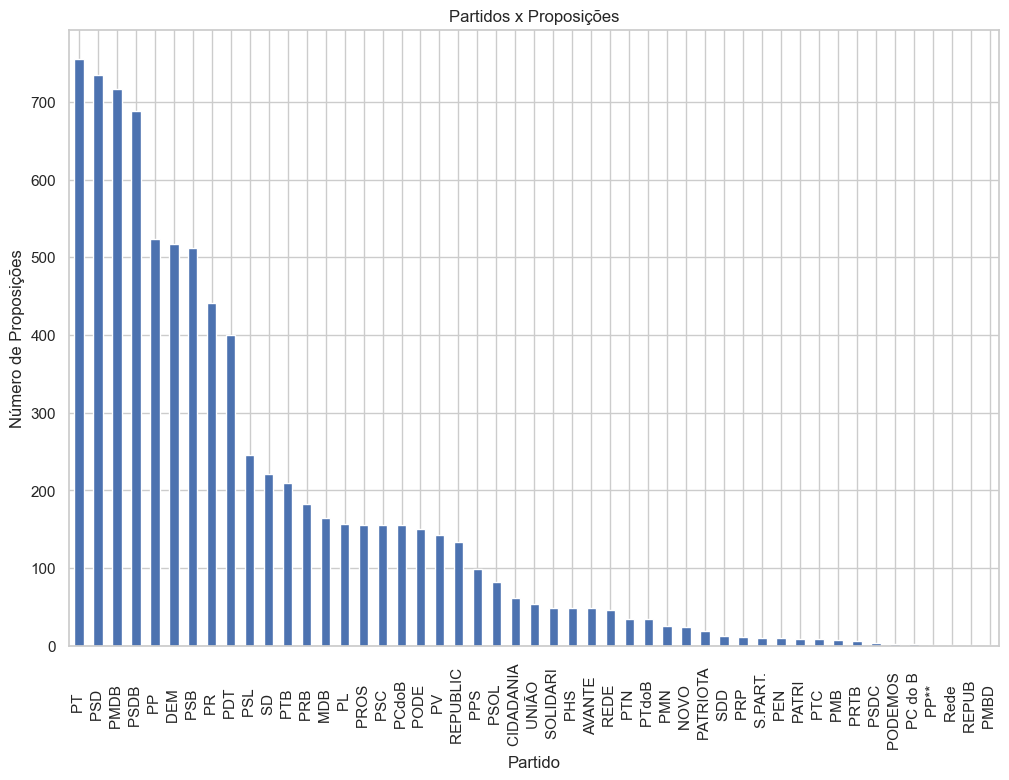

In [64]:
#partidos com mais proposições

#aceitas
partido_mais_virou_lei = df[df['VirouLei'] == 1]['partidoAutor'].value_counts().idxmax()
print(f"Partido com mais proposições que viraram lei: {partido_mais_virou_lei}")

#total de proposições aceitas de cada partido
total_aceitas_por_partido = df[df['VirouLei'] == 1]['partidoAutor'].value_counts()
print("Total de proposições aceitas de cada partido:")
print(total_aceitas_por_partido)

#partidos com mais proposições que viraram lei por ano
partidos_mais_virou_lei_ano = df[df['VirouLei'] == 1].groupby('ano')['partidoAutor'].value_counts().groupby(level=0).idxmax()
quantidade_mais_virou_lei_ano = df[df['VirouLei'] == 1].groupby('ano')['partidoAutor'].value_counts().groupby(level=0).max()

for ano in partidos_mais_virou_lei_ano.index:
    partido = partidos_mais_virou_lei_ano[ano][1]
    quantidade = quantidade_mais_virou_lei_ano[ano]
    print(f"Ano: {ano}, Partido com mais proposições que viraram lei: {partido}, Quantidade: {quantidade}")

#em geral
plt.figure(figsize=(12, 8))
df['partidoAutor'].dropna().value_counts().plot(kind='bar')
plt.title('Partidos x Proposições')
plt.xlabel('Partido')
plt.ylabel('Número de Proposições')
plt.show()

## Adicionando Porcentagem [análise pendente]

In [17]:
percentual = os.path.join('data', 'votacoes_proposicoes_2013_2024_com_percentual.csv')
df_percentual = pd.read_csv(percentual)

In [18]:
df_percentual.rename(columns={'nomeproposicao': 'nomeProposicao'}, inplace=True)

df_unido = pd.merge(df, df_percentual, on='nomeProposicao', how='inner')

df_unido.drop(['resumo', 'data', 'hora', 'objvotacao', 'codsessao', 'bancada_sigla', 'bancada_orientacao'], axis=1, inplace=True)

In [19]:
df_unido.columns

Index(['nomeProposicao', 'idProposicao', 'partidoAutor', 'DataApresentacao',
       'VirouLei', 'Administração e Políticas Públicas',
       'Desenvolvimento Social e Urbano', 'Direitos e Justiça',
       'Economia e Desenvolvimento Sustentável',
       'Infraestrutura e Gestão de Recursos', 'percentual_PMDB',
       'percentual_PRP', 'percentual_PR', 'percentual_DEM', 'percentual_PT',
       'percentual_PCdoB', 'percentual_PSDB', 'percentual_PPS',
       'percentual_PDT', 'percentual_PTB', 'percentual_PSD', 'percentual_PV',
       'percentual_PSC', 'percentual_PP', 'percentual_PTdoB', 'percentual_PSB',
       'percentual_PRB', 'percentual_PSL', 'percentual_PSOL', 'percentual_PMN',
       'percentual_PEN', 'percentual_S.Part.', 'percentual_SDD',
       'percentual_PROS', 'percentual_Solidaried', 'percentual_PHS',
       'percentual_PRTB', 'percentual_PSDC', 'percentual_PTN',
       'percentual_PTC', 'percentual_REDE', 'percentual_PMB',
       'percentual_Podemos', 'percentual_Avante', 

In [21]:
duplicated_ids = df_unido[df_unido['nomeProposicao'].duplicated()]['nomeProposicao']

if duplicated_ids.any():
    df_unido = df_unido.drop_duplicates(subset='nomeProposicao')

In [26]:
num_arquivada = (df_unido['VirouLei'] == 0).sum()
transformada_lei = (df_unido['VirouLei'] == 1).sum()

print(f"Total de situações 'transformadas em lei' (virou lei): {transformada_lei}")
print(f"Total de situações 'arquivada' (não virou lei): {num_arquivada}")


Total de situações 'transformadas em lei' (virou lei): 81
Total de situações 'arquivada' (não virou lei): 7


In [131]:
df_unido

,nomeProposicao,idProposicao,partidoAutor,DataApresentacao,Situacao,Administração e Políticas Públicas,Desenvolvimento Social e Urbano,Direitos e Justiça,Economia e Desenvolvimento Sustentável,Infraestrutura e Gestão de Recursos,...,percentual_PPL,percentual_NOVO,percentual_CIDADANIA,percentual_Republican,percentual_DC,percentual_Rede,percentual_Cidadania,percentual_Novo,percentual_União,percentual_PRD
0,PL 6579/2013,596844,PP,16/10/2013,PLEN - Arquivada,0,0,1,0,0,...,NaN,NaN,NaN,9.002433,NaN,0.486618,1.459854,1.946472,9.975669,NaN
90,PL 6446/2013,593856,PMDB,27/09/2013,Tranformada no(a) Lei Ordinária 13188/2015,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
729,PL 6397/2013,592935,PMDB,20/09/2013,Tranformada no(a) Lei Ordinária 12891/2013,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2593,PL 5735/2013,580148,PT,06/06/2013,Tranformada no(a) Lei Ordinária 13165/2015,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4733,PL 5496/2013,575585,PTB,30/04/2013,PLEN - Arquivada,0,1,0,0,0,...,NaN,NaN,NaN,8.549223,NaN,0.259067,0.518135,0.777202,11.139896,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32950,PL 1847/2024,2454704,UNIÃO,22/08/2024,Tranformada no(a) Lei Ordinária 14973/2024,1,0,0,1,0,...,NaN,NaN,NaN,10.025707,NaN,0.257069,0.514139,0.771208,11.568123,1.028278
32961,PL 3117/2024,2452037,PT,13/08/2024,Tranformada no(a) Lei Ordinária 14981/2024,1,0,0,0,0,...,NaN,NaN,NaN,8.564815,NaN,0.231481,0.925926,0.925926,11.111111,0.925926
32965,PL 858/2024,2447183,MDB,08/07/2024,Tranformada no(a) Lei Ordinária 14947/2024,1,0,1,1,0,...,NaN,NaN,NaN,8.556150,NaN,0.267380,0.802139,0.802139,9.625668,0.802139
32973,PL 545/2024,2419197,PT,05/03/2024,Tranformada no(a) Lei Ordinária 14901/2024,1,0,0,1,0,...,NaN,NaN,NaN,7.514451,NaN,0.289017,1.156069,0.578035,10.982659,0.867052
